<a href="https://colab.research.google.com/github/Akshmehta2002/Akshmehta2002/blob/main/Copy_of_calories_burnt_prediction_aksh_mehta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calories** **Burnt** Prediction


# **Important** liberies

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pandas as pd
import numpy as np

In [ ]:
calories = pd.read_csv('/content/calories.file.csv')
exercise = pd.read_csv('/content/exercise.file.csv')

# Basic **check**

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


# Use **Concat** for joining the **Table**

In [ ]:
data = pd.concat([exercise,calories.Calories],axis=1)
data


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


# **Univariate** Analysis

Through captivating visualizations such as **bar plots, count plots, distplot plots, and line plots,** we visualize the impact of variables such as **gender, age, duration, heart rate, and body temperature** on calorie burn.

# 1.**Countplot**

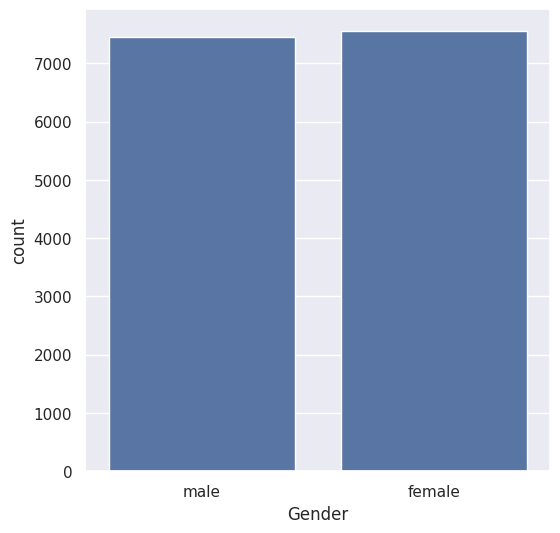

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data.Gender)
plt.show()

In [ ]:
data.shape

(15000, 9)

In [ ]:
data['Gender'].value_counts()

,count
Gender,
female,7553
male,7447


# 2.**Distplot**

<ipython-input-12-5b21129037b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Height)


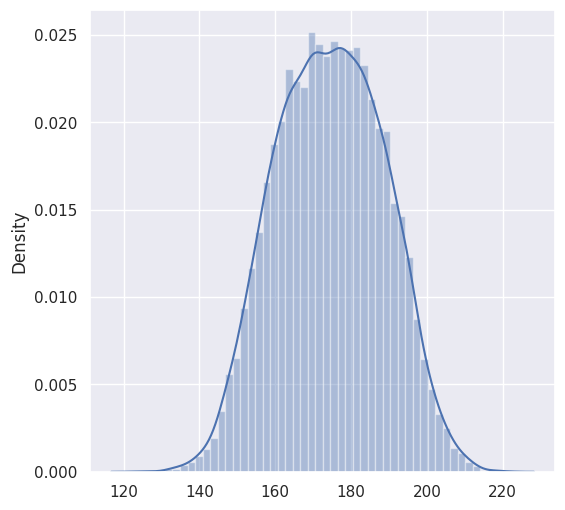

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(x=data.Height)
plt.show()

<ipython-input-13-a8b99bb2583d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Weight)


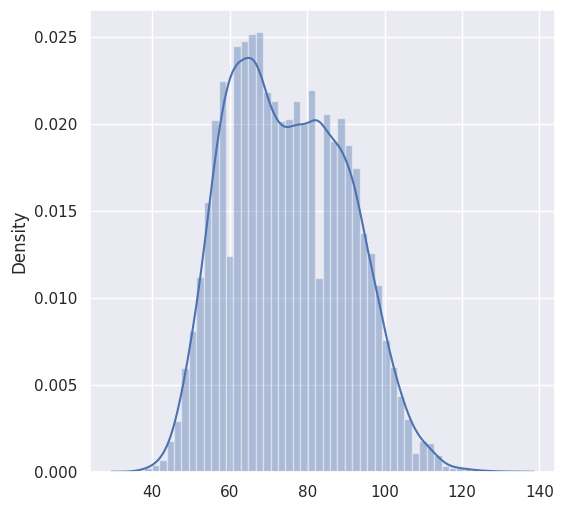

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(x=data.Weight)
plt.show()

<ipython-input-14-c079db9816b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Age)


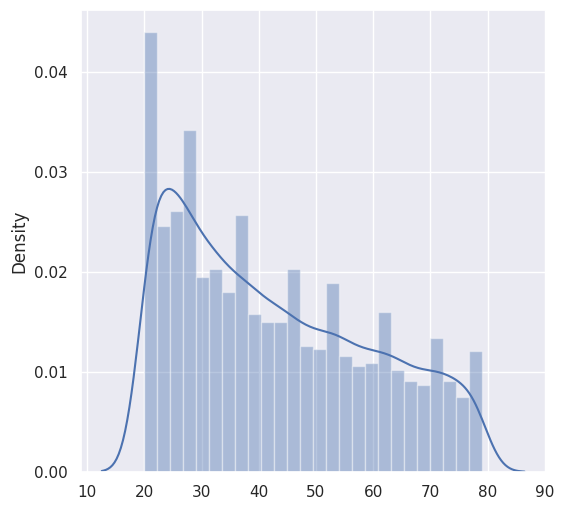

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(x=data.Age)
plt.show()

# 3.**Lineplot**

<Axes: xlabel='Age', ylabel='Calories'>

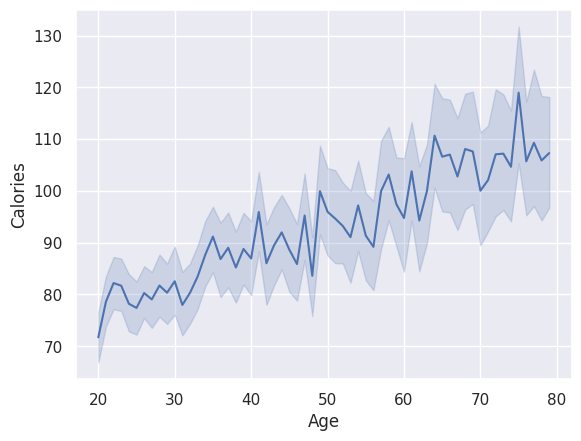

In [ ]:
sns.lineplot(x=data.Age,y=data.Calories)

# **Encoding**


In [ ]:
data['Gender']=data['Gender'].map({'male':1,'female':0})

In [ ]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


# **Train** **Test** Split

In [ ]:
X = data.drop(['User_ID','Calories'],axis=1)
y = data['Calories']

In [ ]:
X.shape

(15000, 7)

In [ ]:
y.shape

(15000,)

In [ ]:
## main code
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(12000, 7)

In [ ]:
x_test.shape

(3000, 7)

# **Training** Model




In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
models = {
    'lr':LinearRegression(),
    'rd':Ridge(),
    'ls':Lasso(),
    'Dtr':DecisionTreeRegressor(),
    'rfr':RandomForestRegressor()
}

In [ ]:
for name, mod in models.items():
  mod.fit(X_train,y_train)
  y_pred = mod.predict(x_test)
  print(f"{name} MSE: {mean_squared_error(y_test,y_pred)}, Score: {r2_score(y_test,y_pred)}")


lr MSE: 131.9957457508168, Score: 0.9672937151257296
rd MSE: 131.99625903139352, Score: 0.9672935879435944
ls MSE: 143.82689461175067, Score: 0.9643621590908397
Dtr MSE: 27.320666666666668, Score: 0.9932304067690041
rfr MSE: 7.1550264666666665, Score: 0.9982271069982549


# **Selecting** Model

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(x_test)

# **Random Forest Regressior**

**MSE**: 7.1550264666666665

**Score**: 0.9982271069982549

# **Conclusion**

 This **machine learning** project that focuses on predicting the number of **calories burnt during physical exercise**. By analyzing a comprehensive dataset comprising exercise patterns and corresponding calorie measurements, we unlock the potential to **gain valuable insights** into optimizing workouts and achieving fitness goals.